In [23]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv("/content/drive/MyDrive/AirBnB/airbnb2.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [26]:
df_train, df_test  = train_test_split(df, test_size=0.25, random_state = 101)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1593 to 863
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1500 non-null   int64  
 1   log_price               1500 non-null   float64
 2   property_type           1500 non-null   object 
 3   room_type               1500 non-null   object 
 4   amenities               1500 non-null   object 
 5   accommodates            1500 non-null   int64  
 6   bathrooms               1494 non-null   float64
 7   bed_type                1500 non-null   object 
 8   cancellation_policy     1500 non-null   object 
 9   cleaning_fee            1500 non-null   bool   
 10  city                    1500 non-null   object 
 11  description             1500 non-null   object 
 12  first_review            1121 non-null   object 
 13  host_has_profile_pic    1494 non-null   object 
 14  host_identity_verified  1494 non-null   obj

In [28]:
df_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.500000e+03,1500.000000,1500.000000,1494.000000,1500.000000,1500.000000,1500.000000,1105.000000,1498.000000,1497.000000
mean,1.141842e+07,4.796945,3.068000,1.208501,38.433050,-92.546821,20.021333,93.757466,1.246328,1.680695
std,6.207801e+06,0.706928,1.948137,0.514558,3.041900,21.914962,37.160357,8.911247,0.791616,1.184620
min,2.072400e+04,2.890372,1.000000,0.000000,33.736322,-122.508521,0.000000,20.000000,0.000000,1.000000
25%,5.997032e+06,4.317488,2.000000,1.000000,34.145094,-118.356794,0.000000,91.000000,1.000000,1.000000
50%,1.300134e+07,4.744932,2.000000,1.000000,40.656833,-76.978497,5.000000,96.000000,1.000000,1.000000
75%,1.666634e+07,5.220356,4.000000,1.000000,40.737713,-73.954307,21.250000,100.000000,1.000000,2.000000
max,2.118810e+07,7.569412,16.000000,5.500000,42.381566,-70.991861,384.000000,100.000000,6.000000,16.000000


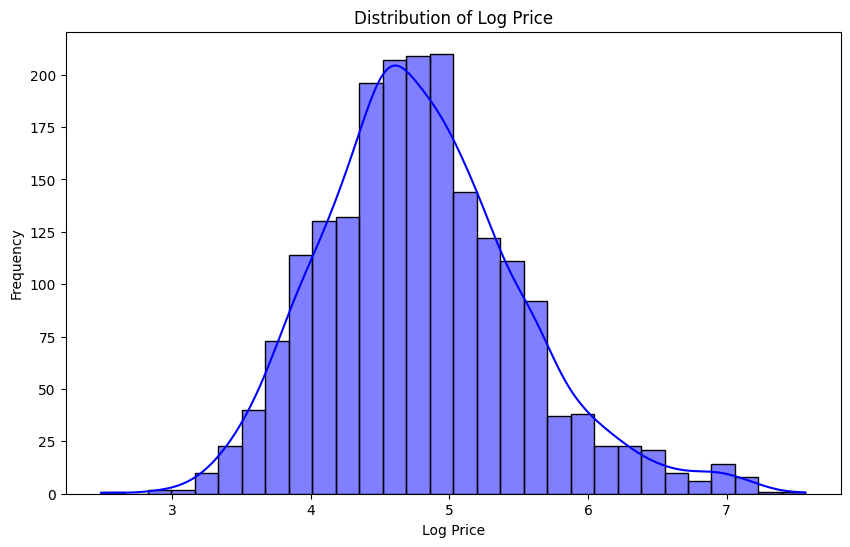

In [29]:
# distribution of price across the dataset

#histogram with kde for `log_price`
#KDE is the lining above the histogram indicates density estimate for better analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Log Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

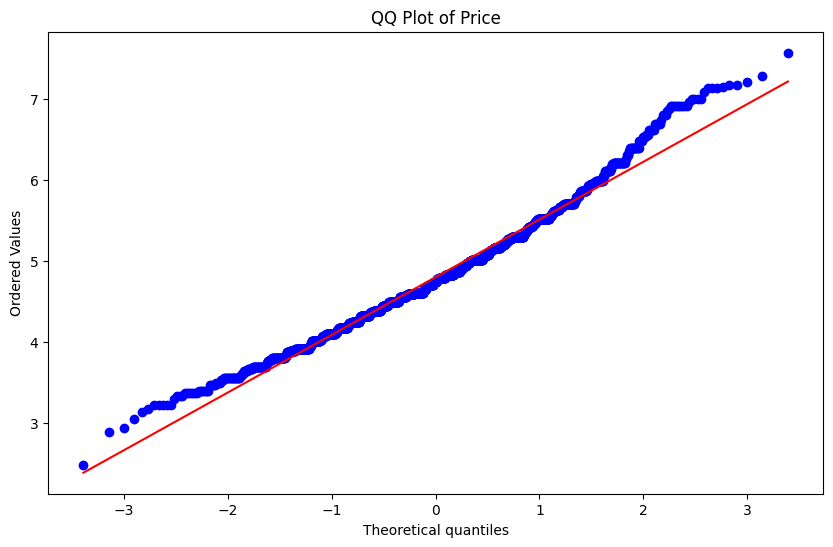

In [30]:
#qqplot of the price
plt.figure(figsize=(10, 6))
stats.probplot(df['log_price'], dist="norm", plot=plt)
plt.title('QQ Plot of Price')
plt.show()


In [31]:
# check for outliers in the dataset (boxplot)

In [32]:
#  Handle outliers

In [33]:
# Handle the categorical values

In [34]:
# Normalize the numerical values

# Model training

In [35]:
# use linear regression to train the model

In [36]:
# evaluate the model on the testing dataset